# Modeling Multiclass Dataset

### Import Packages

In [1]:
import pandas as pd
import seaborn
import math
import sklearn
import datetime
from sklearn import model_selection

### Import Raw SQL Data
-Static User Data

-Dynamic Sessions Data (Features)

In [2]:
Train_Users=pd.DataFrame(pd.read_csv("data/train_users_2.csv"))

Feature_sessions=pd.read_csv('data/session_features.csv')


In [3]:
Feature_sessions.head(2)

,user_id,action=other,action=update,action=dashboard,action=collections,action=confirm_email,action=reviews,action=requested,action=unavailabilities,action=similar_listings,...,device_type=-unknown-,device_type=Windows Desktop,device_type=Tablet,device_type=Android Phone,device_type=iPhone,device_type=iPad Tablet,secs_elapsed_mean,secs_elapsed_std,secs_elapsed_median,secs_elapsed_skew
0,00023iyk9l,4,0,4,0,1,0,5,0,3,...,0,0,0,0,4,0,21697.375000,91120.253083,843.0,5.604319
1,0010k6l0om,3,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,9310.190476,22598.464587,847.0,3.550714


### Join Static and Dynamic Data

In [4]:
User_Session_df=pd.merge(Train_Users, Feature_sessions, left_on = 'id', right_on = 'user_id')

In [5]:
# User_Session_df.to_csv('EDA_DATA.csv')

In [6]:
#Validate Columns:
User_Session_df.groupby('country_destination')['country_destination'].count().head(3)

country_destination
AU    152
CA    440
DE    250
Name: country_destination, dtype: int64

### Replace Nulls and Invalid Values

In [7]:
User_Session_df_v1=User_Session_df.replace({'-unknown-':np.nan,'OTHER':np.nan}).copy()
#clean up age
len(User_Session_df_v1)

73815

### Declare Date_Time Objects


In [8]:
#Update timeseries object. 
User_Session_df_v1['date_first_booking'] = pd.to_datetime(User_Session_df_v1['date_first_booking'], errors='coerce')
User_Session_df_v1['date_account_created'] = pd.to_datetime(User_Session_df_v1['date_account_created'], errors='coerce')
User_Session_df_v1['timestamp_first_active'] = pd.to_datetime(User_Session_df_v1['timestamp_first_active'], errors='coerce')

### Generate additional Features:

In [9]:
User_Session_df_v1['Age_Over40'] = (User_Session_df_v1.age >39).map({True:1,False:0})
User_Session_df_v1['Age_31-39'] = ((User_Session_df_v1.age<40) & (User_Session_df_v1.age>30)).map({True:1,False:0})
User_Session_df_v1['Age_Under31'] = (User_Session_df_v1.age <31).map({True:1,False:0})
User_Session_df_v1['Age_unknown'] = (User_Session_df_v1.age.isnull()).map({True:1,False:0})

In [10]:
User_Session_df_v1['Month_account_created']=pd.DatetimeIndex(User_Session_df_v1['date_account_created']).month

In [11]:
User_Session_df_v2=User_Session_df_v1.copy()


### Prep Data for Modeling

In [12]:
model_data=User_Session_df_v2
model_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,device_type=iPad Tablet,secs_elapsed_mean,secs_elapsed_std,secs_elapsed_median,secs_elapsed_skew,Age_Over40,Age_31-39,Age_Under31,Age_unknown,Month_account_created
0,d1mm9tcy42,2014-01-01,1970-01-01 05:35:40.101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,0,26988.409449,69127.594623,947.0,5.346696,1,0,0,0,1
1,yo8nz8bqcq,2014-01-01,1970-01-01 05:35:40.101001558,NaT,NaN,NaN,basic,0,en,direct,...,0,23093.444444,37975.250115,4080.0,1.857508,0,0,0,1,1
2,4grx6yxeby,2014-01-01,1970-01-01 05:35:40.101001639,NaT,NaN,NaN,basic,0,en,sem-brand,...,0,70965.187500,91377.272402,60587.5,1.641905,0,0,0,1,1
3,ncf87guaf0,2014-01-01,1970-01-01 05:35:40.101002146,NaT,NaN,NaN,basic,0,en,direct,...,0,24704.598684,84140.107158,1569.5,5.527073,0,0,0,1,1
4,4rvqpxoh3h,2014-01-01,1970-01-01 05:35:40.101002619,2014-01-02,NaN,NaN,basic,25,en,direct,...,0,319.250000,325.353324,195.5,0.810504,0,0,0,1,1


In [13]:
## Export Model Data for Future Analysis:
model_data.to_csv('data/model_data_v1.csv',index=False)

In [14]:
pd.read_csv('data/model_data_v1.csv').head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,device_type=iPad Tablet,secs_elapsed_mean,secs_elapsed_std,secs_elapsed_median,secs_elapsed_skew,Age_Over40,Age_31-39,Age_Under31,Age_unknown,Month_account_created
0,d1mm9tcy42,2014-01-01 00:00:00.000000000,1970-01-01 05:35:40.101000936,2014-01-04 00:00:00.000000000,MALE,62.0,basic,0,en,sem-non-brand,...,0,26988.409449,69127.594623,947.0,5.346696,1,0,0,0,1
1,yo8nz8bqcq,2014-01-01 00:00:00.000000000,1970-01-01 05:35:40.101001558,NaN,NaN,NaN,basic,0,en,direct,...,0,23093.444444,37975.250115,4080.0,1.857508,0,0,0,1,1
2,4grx6yxeby,2014-01-01 00:00:00.000000000,1970-01-01 05:35:40.101001639,NaN,NaN,NaN,basic,0,en,sem-brand,...,0,70965.187500,91377.272402,60587.5,1.641905,0,0,0,1,1
3,ncf87guaf0,2014-01-01 00:00:00.000000000,1970-01-01 05:35:40.101002146,NaN,NaN,NaN,basic,0,en,direct,...,0,24704.598684,84140.107158,1569.5,5.527073,0,0,0,1,1
4,4rvqpxoh3h,2014-01-01 00:00:00.000000000,1970-01-01 05:35:40.101002619,2014-01-02 00:00:00.000000000,NaN,NaN,basic,25,en,direct,...,0,319.250000,325.353324,195.5,0.810504,0,0,0,1,1


### Handselect Features for First Model

In [15]:
model_data_v2 = model_data[[
#  'date_account_created', 'timestamp_first_active', 'date_first_booking','date_account_created',   
#     'secs_elapsed_std','secs_elapsed_median',

       'gender', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'action=other',
       'action=update', 'action=dashboard', 'action=collections',
       'action=confirm_email', 'action=reviews', 'action=requested',
       'action=unavailabilities', 'action=similar_listings', 'action=active',
       'action=show', 'action=qt2', 'action=personalize',
       'action=social_connections', 'action=identity', 'action=header_userpic',
       'action=search_results', 'action=create', 'action=edit',
       'action=similar_listings_v2', 'action=index',
       'action=ajax_refresh_subtotal', 'action=lookup', 'action=campaigns',
       'action=track_page_view', 'action=notifications', 'action=search',
       'action=-1', 'action_type=other', 'action_type=data',
       'action_type=click', 'action_type=message_post',
       'action_type=-unknown-', 'action_type=view', 'action_type=submit',
       'action_type=-1', 'action_detail=other', 'action_detail=message_post',
       'action_detail=edit_profile', 'action_detail=view_search_results',
       'action_detail=dashboard', 'action_detail=message_thread',
       'action_detail=similar_listings', 'action_detail=user_profile',
       'action_detail=contact_host', 'action_detail=unavailable_dates',
       'action_detail=p3', 'action_detail=create_user',
       'action_detail=change_trip_characteristics', 'action_detail=-unknown-',
       'action_detail=header_userpic', 'action_detail=user_social_connections',
       'action_detail=listing_reviews',
       'action_detail=wishlist_content_update', 'action_detail=update_listing',
       'action_detail=confirm_email_link', 'action_detail=user_wishlists',
       'action_detail=-1', 'device_type=other',
       'device_type=Android App Unknown Phone/Tablet',
       'device_type=Mac Desktop', 'device_type=-unknown-',
       'device_type=Windows Desktop', 'device_type=Tablet',
       'device_type=Android Phone', 'device_type=iPhone',
       'device_type=iPad Tablet',  'Age_Over40', 'Age_31-39',
       'Age_Under31', 'Age_unknown', 'Month_account_created']]


In [16]:
# ## Export Model Data for Future Analysis:
# model_data_v2.to_csv('data/)

### Dummify Features 

In [17]:
df_dummified_x = pd.get_dummies(
    model_data_v2,
    columns=['Age_Over40', 'Age_31-39',
       'Age_Under31', 'Age_unknown', 'Month_account_created','gender', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],drop_first=True)
df_dummified_y = model_data['country_destination']
#check veriable length.
len(df_dummified_y) == len(df_dummified_x)
df_dummified_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 0 to 73814
Columns: 181 entries, action=other to first_browser_wOSBrowser
dtypes: int64(67), uint8(114)
memory usage: 46.3 MB


### Split into Train and Test

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_dummified_x, df_dummified_y, test_size=0.3, stratify=df_dummified_y)
Xy_train=X_train,y_train

### Tuple Variables for Model Input

In [19]:
skip_size = 10 # skip every n examples for SVM Models. 
Xy_train_skip=X_train[::skip_size],y_train[::skip_size]

Xy_test=X_test,y_test
Xy_test_skip=X_test[::skip_size],y_test[::skip_size]

len(Xy_train[0])



51670

### Establish Baseline

In [20]:
#Baseline is 61%
y_test.value_counts()/len(y_test)

NDF      0.610205
US       0.272251
other    0.049492
FR       0.019417
IT       0.013276
GB       0.009889
ES       0.009573
CA       0.005961
DE       0.003387
NL       0.003342
AU       0.002077
PT       0.001129
Name: country_destination, dtype: float64

### Fit and Test Random Forest Classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,warm_start=True)

In [22]:
rfc.fit(*Xy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [23]:
rfc.score(*Xy_train)

0.70522546932455965

In [24]:
rfc.score(*Xy_test)

0.68123729961616619

### Fit and Test Random Logistic Regression

In [25]:
from sklearn import linear_model
lr_logistical=linear_model.LogisticRegression()
lr_logistical2=linear_model.LogisticRegression()


In [26]:
import numpy as np
lr_logistical.fit(*Xy_train)
lr_logistical.score(*Xy_train)

0.68647184052641763

In [27]:
lr_logistical.score(*Xy_test)

0.68733348385640103

### Declare Classify Function to quantify Model Performance 

In [28]:
from sklearn import metrics
def classify(model,X_test,X_train,y_train):
    """predicts y first, classify, """
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    print(model.score(*Xy_test))
#     print(metrics.confusion_matrix(y_test, y_pred))

In [29]:
classify(rfc,X_test,X_train,y_train)

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00        46
         CA       0.00      0.00      0.00       132
         DE       0.00      0.00      0.00        75
         ES       0.00      0.00      0.00       212
         FR       1.00      0.00      0.00       430
         GB       0.00      0.00      0.00       219
         IT       0.00      0.00      0.00       294
        NDF       0.71      0.92      0.80     13513
         NL       0.00      0.00      0.00        74
         PT       0.00      0.00      0.00        25
         US       0.56      0.44      0.49      6029
      other       0.00      0.00      0.00      1096

avg / total       0.61      0.68      0.63     22145

0.681237299616


/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Compare Various Models: 

LR: 0.667314 (0.009806)
KNN: 0.602284 (0.003600)
SVM: 0.622800 (0.006314)
RFC: 0.685313 (0.010390)


/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/depre

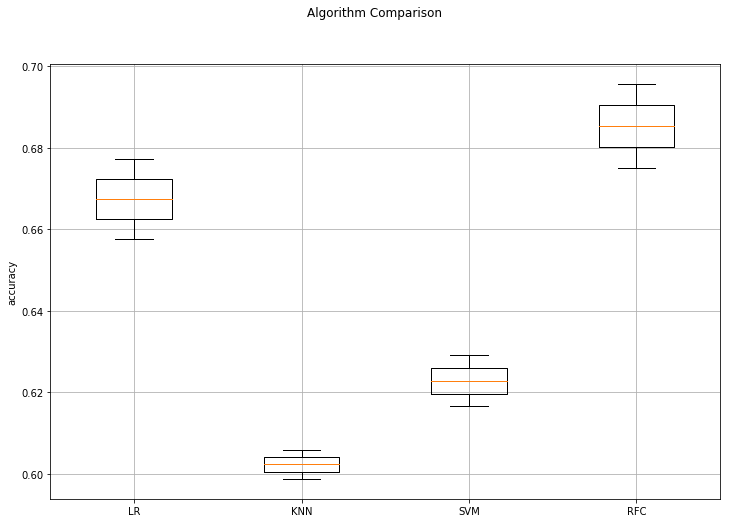

In [30]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = list_col2
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier(max_depth=6.5,min_samples_split=48,verbose=0,max_features=60,oob_score=True)))
# 
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=2, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train[::skip_size], y_train[::skip_size], cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison

import seaborn
fig = plt.figure(figsize=(12,8))
plt.grid()
plt.ylabel("accuracy")
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# fig.savefig('compare.jpeg', format='jpeg', dpi=400)
plt.show()


### Visualize Random Forest Parameters

/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


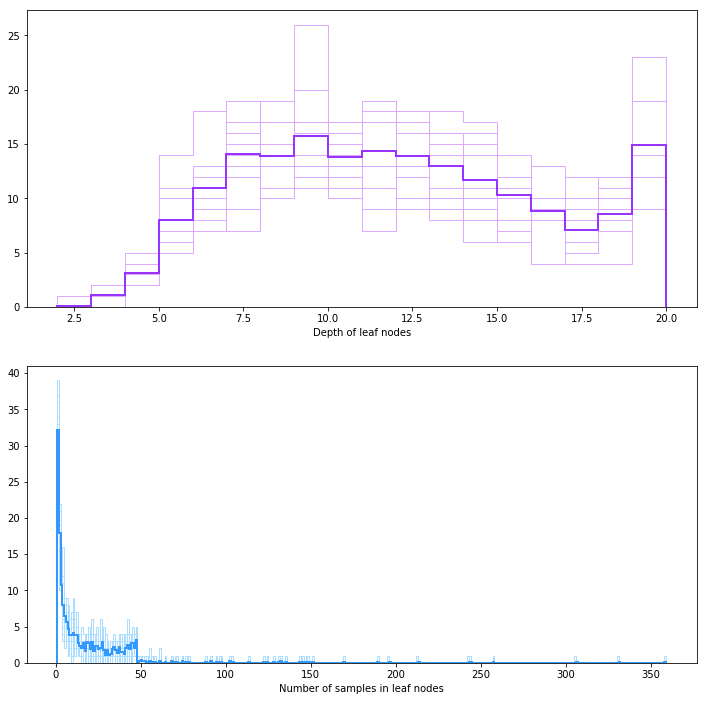

In [32]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import _tree, export_graphviz
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

from sklearn.utils import check_random_state


def leaf_depths(tree, node_id=0):

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:

        depths = np.array([0])

    else:

        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths


def leaf_samples(tree, node_id=0):

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:

        samples = np.array([tree.n_node_samples[node_id]])

    else:

        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples


def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8, 8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(
        depths,
        histtype='step',
        color='#9933ff',
        bins=range(min(depths),
                   max(depths) + 1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)

    plt.subplot(212)

    samples = leaf_samples(tree)
    plt.hist(
        samples,
        histtype='step',
        color='#3399ff',
        bins=range(min(samples),
                   max(samples) + 1))

    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)

    plt.show()


def draw_ensemble(ensemble):

    plt.figure(figsize=(12, 12))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(
            depths,
            histtype='step',
            color='#ddaaff',
            bins=range(min(depths),
                       max(depths) + 1))

    plt.hist(
        depths_all,
        histtype='step',
        color='#9933ff',
        bins=range(min(depths_all),
                   max(depths_all) + 1),
        weights=np.ones(len(depths_all)) / len(ensemble.estimators_),
        linewidth=2)
    plt.xlabel("Depth of leaf nodes")

    samples_all = np.array([], dtype=int)

    plt.subplot(212)

    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(
            samples,
            histtype='step',
            color='#aaddff',
            bins=range(min(samples),
                       max(samples) + 1))

    plt.hist(
        samples_all,
        histtype='step',
        color='#3399ff',
        bins=range(min(samples_all),
                   max(samples_all) + 1),
        weights=np.ones(len(samples_all)) / len(ensemble.estimators_),
        linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")

    plt.show()


boston = load_boston()
X = boston.data
y = boston.target

rnd = check_random_state(0)
skip_size
ensemble = RandomForestClassifier(
    max_depth=20,
    min_samples_split=48,
    verbose=0,
    max_features=60,
    oob_score=True)
ensemble.fit(X_train[::skip_size], y_train[::skip_size])

draw_ensemble(ensemble)

# max_depth=12 indeed results in maximum depth of xx and leads to less complex trees and more samples in the leaf nodes:
# To validate these two helper functions, one can visualize the effect of max_depth and min_samples_leaf on underlying trees in the forest. 